In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
import os

X = np.load("checkpoints/kmeans/X.npy")
X_raw = np.load("checkpoints/kmeans/X_raw.npy")
w = np.load("checkpoints/kmeans/w.npy")
W = np.load("checkpoints/kmeans/W.npy")
V = np.load("checkpoints/kmeans/V.npy")

In [3]:
from matplotlib.animation import FuncAnimation


def animate_line(states):
    T, _ = states.shape

    # Create a figure and 3D axis for the scatter plot
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection="3d")
    #scatter = ax.scatter([], [], [], c="b", marker="o")
    trajectory, = ax.plot([], [], [], lw=2, c='b', alpha=0.33)
    trajectory2, = ax.plot([], [], [], lw=2, c='b', alpha=0.33)
    trajectory3, = ax.plot([], [], [], lw=2, c='b', alpha=0.33)

    ax = fig.add_subplot(111, projection="3d")
    
    # Set axis limits
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    k = 6

    # Update function for animation
    def update(i):
        #x = positions[frame, 0, :]
        #y = positions[frame, 1, :]
        #z = positions[frame, 2, :]
        #scatter._offsets3d = (x, y, z)

        #line.set_data(trajectory[:, 0], trajectory[:, 1])
        #line.set_3d_properties(trajectory[:, 2])
        trajectory.set_data(states[k*max(i-40, 0):k*i, 0], states[k*max(i-40, 0):k*i, 1])
        trajectory.set_3d_properties(states[k*max(i-40, 0):k*i, 2])
        trajectory2.set_data(states[k*max(i-80, 0):k*i, 0], states[k*max(i-80, 0):k*i, 1])
        trajectory2.set_3d_properties(states[k*max(i-80, 0):k*i, 2])
        trajectory3.set_data(states[k*max(i-120, 0):k*i, 0], states[k*max(i-120, 0):k*i, 1])
        trajectory3.set_3d_properties(states[k*max(i-120, 0):k*i, 2])
        #trajectory.set_alpha(np.minimum(np.ones(i), 0.5 + np.exp(-0.1 * np.arange(i))))

        return trajectory, trajectory2, trajectory3

    # Create the animation
    plt.tight_layout()
    ani = FuncAnimation(fig, update, frames=T//k, blit=True, interval=1)
    return fig, ani

In [40]:
from matplotlib.animation import FuncAnimation


def animate_encoding(encoding):
    T, _, N = encoding.shape

    # Create a figure and 3D axis for the scatter plot
    fig, ax = plt.subplots(3, figsize=(7, 4))
    
    line1, = ax[0].plot([], [], c='b', linewidth=2, alpha=1)
    line2, = ax[1].plot([], [], c='b', linewidth=2, alpha=1)
    line3, = ax[2].plot([], [], c='b', linewidth=2, alpha=1)
    
    k = 6
    x = np.arange(N)
    ax[1].set_ylabel('input current')
    fig.suptitle('population coded input for x, y, z')
    ax[2].set_xlabel('neuron id')

    # Update function for animation
    def update(i):
        line1.set_data(x, encoding[k*i, 0])
        line2.set_data(x, encoding[k*i, 1])
        line3.set_data(x, encoding[k*i, 2])
        
        ax[0].set_xlim([x[0],x[-1]])
        ax[1].set_xlim([x[0],x[-1]])
        ax[2].set_xlim([x[0],x[-1]])
        ax[0].set_ylim([0, 1.1])
        ax[1].set_ylim([0, 1.1])
        ax[2].set_ylim([0, 1.1])

        return line1, line2, line3

    # Create the animation
    ani = FuncAnimation(fig, update, frames=T//k, blit=False, interval=1)
    plt.tight_layout()
    return fig, ani

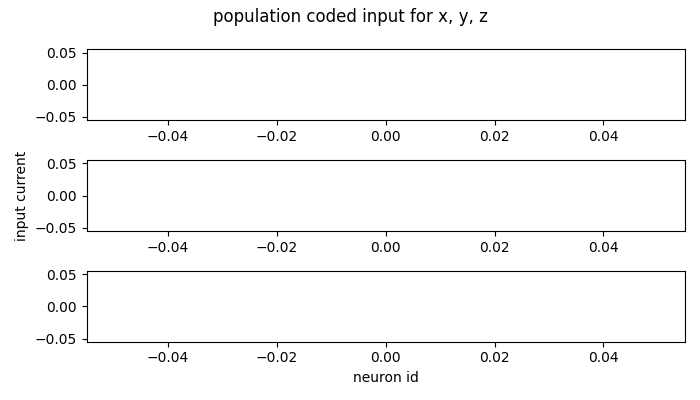

In [41]:
%matplotlib widget
fig, ani = animate_encoding(X[1600:4500])

In [43]:
plt.close(fig)

In [42]:
ani.save("nena/encoding.gif", fps=60)

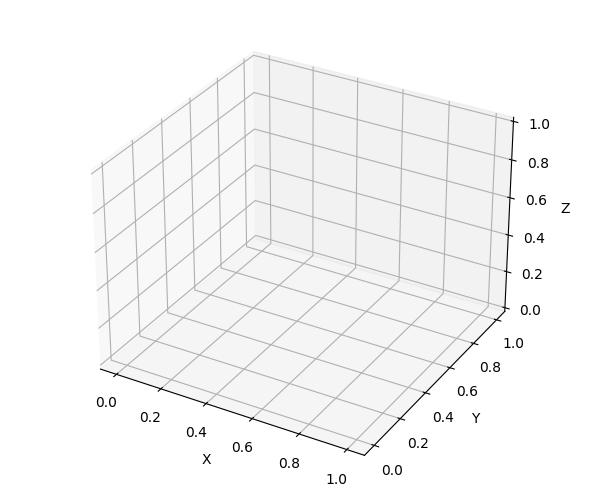

In [38]:
%matplotlib widget
fig, ani = animate_line(X_raw[1600:4500])

In [34]:
ani.save("nena/lorenz.gif", fps=60)

In [39]:
plt.close(fig)

In [3]:
def estimate_scalars_from_tuning_curves(tuning_curves):
    """
    Estimate scalar values from arrays of N-dimensional tuning curves.
    
    Args:
    tuning_curves (ndarray): Array of N-dimensional arrays representing tuning curves.
    width (float): Width of the Gaussian curve used to generate the tuning curves.
    
    Returns:
    estimated_scalars (ndarray): Array of estimated scalar values.
    """
    dimensions = tuning_curves.shape[1]
    width = 1/dimensions
    positions = np.linspace(-3 * width, 1 + 3 * width, dimensions)
    
    # Compute the estimated scalar values for each tuning curve
    tuning_curves = tuning_curves.copy()
    tuning_curves += 1e-3
    tuning_curves = tuning_curves / (tuning_curves.sum(1)[:, np.newaxis])
    estimated_scalars = np.sum(positions * tuning_curves, axis=1) / (np.sum(tuning_curves, axis=1))
    return estimated_scalars

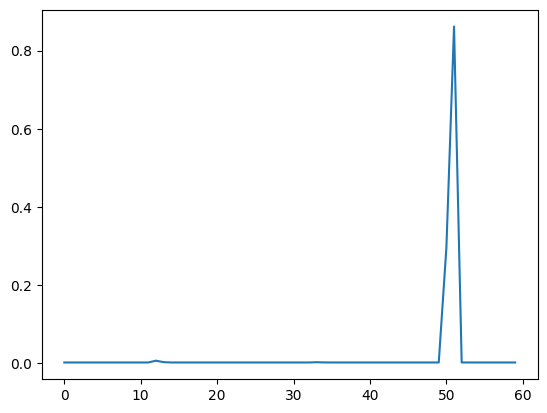

In [4]:
%matplotlib inline
plt.figure()
plt.plot(w[6].flatten() + 1e-3)

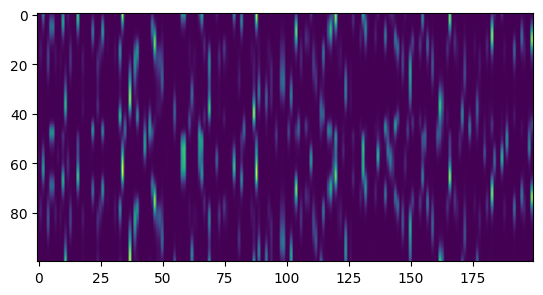

In [5]:
plt.imshow(V[-100:])

In [6]:
X[:5000].shape, W.shape, V.shape

((5000, 3, 20), (5000, 200, 3, 20), (5000, 200))

In [7]:
## Calculating the synaptic activity
t = 500

S = X[t, None] * W[t]

In [8]:
S.shape

(200, 3, 20)

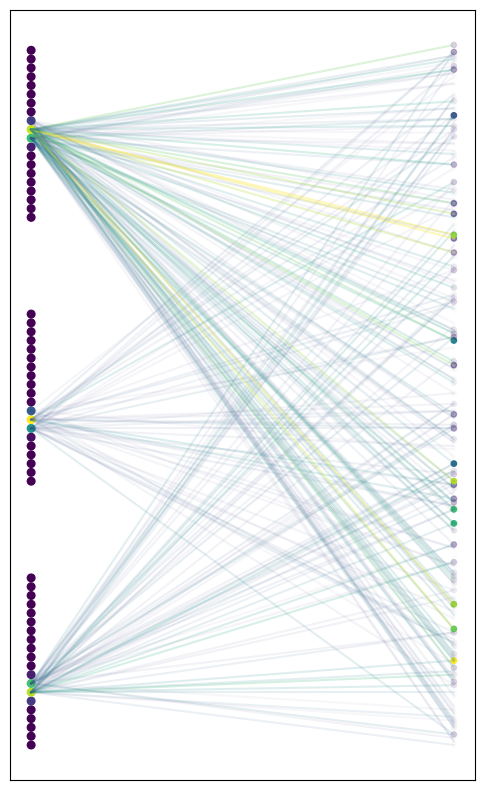

In [9]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(6, 10))

# Function to adjust space between the input groups
def adjust_coordinates(coordinates, gap, group_size):
    adjusted_coordinates = []
    for idx, coord in enumerate(coordinates):
        offset = idx // group_size * gap
        adjusted_coordinates.append(coord + offset)
    return np.array(adjusted_coordinates)

# Variables
gap = 10
group_size = 20

# Generate coordinates for input layer and hidden layer
input_coords = (200 / 80) * adjust_coordinates(list(range(3*group_size)), gap, group_size)
hidden_coords = np.array(list(range(200)))

# Plot input layer and hidden layer with vertical space
for i in range(3):
    for j in range(20):
        for k in range(200):
            if S[k, i, j] > 1e-1:
                # Plot an active synapse.
                ax.plot((0, 0.5), (input_coords[i * 20 + j], hidden_coords[k]), 
                        alpha = np.minimum(0.3 * (S[k, i, j] / S.max()), 1),
                        color=plt.cm.viridis(S[k, i, j] / S.max()),
                        )

# Plot activity of input layer neurons
ax.scatter([0]*len(input_coords), input_coords, c=X[t], cmap='viridis', s=3e1)

# Plot activity of hidden layer neurons
ax.scatter([0.5]*len(hidden_coords), hidden_coords, c=V[t], cmap='viridis', s=1.5e1, alpha=np.minimum(5 * V[t], 1))

ax.set_xticks([])
ax.set_yticks([])

# Set the limits
#ax.set_xlim([-0.25, 0.75])

plt.show()

In [16]:
n_steps, n_features, n_units_p = X.shape

unit_locations = np.array([
    [
        estimate_scalars_from_tuning_curves(w[:, i])
        for i in range(n_features)
    ]
    for w in W
])

In [18]:
def animate_all(positions, trajectory, activations, input_coords, hidden_coords, S, X):
    T, _, N = positions.shape

    # Create a figure and 3D axis for the scatter plot
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    scatter = ax2.scatter([], [], [], c=[], marker='o')
    line = ax2.plot([], [], [], c='b', linewidth=0.5, alpha=0.5)

    unit_scatter1 = ax1.scatter([0]*len(input_coords), input_coords, cmap='viridis', c=X[0], s=3e1)
    unit_scatter2 = ax1.scatter([0.5]*len(hidden_coords), hidden_coords, cmap='viridis', c=V[0], s=1.5e1)#, alpha=[])

    # Define neuron plots
    #neuron_plots = []
    #for i in range(3):
    #    for j in range(group_size):
    #        neuron_plots.append(ax1.plot((0, 0.5),
    #                                     (input_coords[i * 20 + j], input_coords[i * 20 + j]),
    #                                     alpha=0, color=plt.cm.viridis(0))[0])  # initially empty

    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_zlim(0, 1)

    ax1.set_xticks([])
    ax1.set_yticks([])

    # Update function for animation
    def update(frame):
        S = X[frame, None] * W[frame]
        
        # Update scatter and line plots
        x = positions[frame, 0, :]
        y = positions[frame, 1, :]
        z = positions[frame, 2, :]
        scatter._offsets3d = (x, y, z)
        scatter.set_array(activations[frame])

        line.set_data(trajectory[:frame, 0], trajectory[:frame, 1])
        line.set_3d_properties(trajectory[:frame, 2])

        # Update neuron activity plots
        #unit_scatter1.set_array(X[frame])
        unit_scatter2.set_array(V[frame])
        unit_scatter2.set_alpha(np.minimum(5 * V[frame], 1))
        #for i in range(3):
        #    for j in range(20):
        #        for k in range(T):
        #            if S[k, i, j] > 1e-1:
        #                neuron_plots[i*20+j].set_alpha(np.minimum(0.3 * (S[k, i, j] / S.max()), 1))
        #                neuron_plots[i*20+j].set_color(plt.cm.viridis(S[k, i, j] / S.max()))

        return unit_scatter1, unit_scatter2, scatter, line

    # Create the animation
    ani = FuncAnimation(fig, update, frames=T, blit=False, interval=1)
    return fig, ani

In [4]:
def adjust_coordinates(coordinates, gap, group_size):
    adjusted_coordinates = []
    for idx, coord in enumerate(coordinates):
        offset = idx // group_size * gap
        adjusted_coordinates.append(coord + offset)
    return np.array(adjusted_coordinates)

gap = 10
group_size = 30

input_coords = (420 / 80) * adjust_coordinates(list(range(3*group_size)), gap, group_size)
hidden_coords = np.array(list(range(600)))

In [5]:
def animate_nn(X, V, w):
    T = len(X)

    fig = plt.figure(figsize=(4, 4))
    ax1 = fig.add_subplot(111)

    unit_scatter1 = ax1.scatter([0]*len(input_coords), input_coords, cmap='viridis', c=X[0].flatten(), s=3e1)
    unit_scatter2 = ax1.scatter([0.5]*len(hidden_coords), hidden_coords, cmap='viridis', c=V[0], s=3e1)#, alpha=[])

    ax1.set_xticks([])
    ax1.set_yticks([])

    t_factor = 6
    
    # Initialize empty nested list for neuron_plots
    neuron_plots = [[[None for _ in range(group_size)] for _ in range(3)] for _ in range(600)]

    # Append plots to nested list
    for i in range(600):
        for j in range(3):
            for k in range(group_size):
                neuron_plots[i][j][k] = ax1.plot((0, 0.5),
                                                  (input_coords[j * 30 + k], hidden_coords[i]),
                                                  linewidth=0.5,
                                                  alpha=0, color=plt.cm.viridis(0))[0]  # initially empty

    # Update function for animation
    def update(frame):        
        unit_scatter1.set_array(X[t_factor * frame].flatten())
        unit_scatter2.set_array(V[t_factor * frame])
        unit_scatter2.set_alpha(np.minimum(3 * V[t_factor * frame], 1))

        S = X[t_factor * frame, None] * w

        for i in range(600):
            for j in range(3):
                for k in range(30):
                    if S[i, j, k] > 1e-1:
                        neuron_plots[i][j][k].set_alpha(np.minimum(0.3 * (S[i, j, k] / S.max()), 1))
                        neuron_plots[i][j][k].set_color(plt.cm.viridis(S[i, j, k] / S.max()))
                    else:
                        neuron_plots[i][j][k].set_alpha(0)

        return unit_scatter1, unit_scatter2

    # Create the animation
    ani = FuncAnimation(fig, update, frames=T//t_factor, blit=True, interval=1)
    return fig, ani

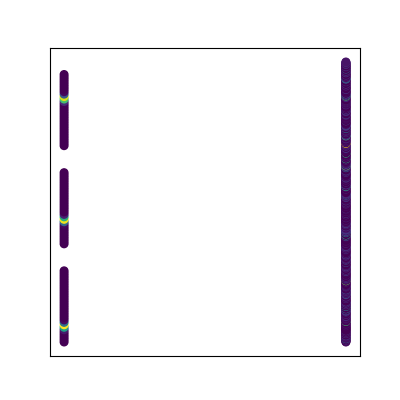

In [6]:
%matplotlib widget
fig, ani = animate_nn(X[1600:4500], V[1600:4500], w)

In [7]:
plt.close(fig)

In [8]:
ani.save("nena/nn.gif", fps=60)

In [44]:
def animate_ax1(positions, X, V):
    T = 5000

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    scatter = ax2.scatter([], [], [], c=[], marker='o')
    line = ax2.plot([], [], [], c='b', linewidth=0.5, alpha=0.5)

    unit_scatter1 = ax1.scatter([0]*len(input_coords), input_coords, cmap='viridis', c=X[0].flatten(), s=3e1)
    unit_scatter2 = ax1.scatter([0.5]*len(hidden_coords), hidden_coords, cmap='viridis', c=V[0], s=2e1)#, alpha=[])

    ax1.set_xticks([])
    ax1.set_yticks([])

    # Update function for animation
    def update(frame):
        x = positions[frame, 0, :]
        y = positions[frame, 1, :]
        z = positions[frame, 2, :]
        scatter._offsets3d = (x, y, z)
        scatter.set_array(V[frame])
        
        unit_scatter1.set_array(X[frame].flatten())
        unit_scatter2.set_array(V[frame])
        unit_scatter2.set_alpha(np.minimum(5 * V[frame], 1))

        return unit_scatter1, unit_scatter2

    # Create the animation
    ani = FuncAnimation(fig, update, frames=T, blit=True, interval=1)
    return fig, ani

In [45]:
%matplotlib widget
fig, ani = animate_ax1(X, V)

NameError: name 'unit_locations' is not defined

In [62]:
plt.close(fig)

In [21]:
unit_locations.shape

(5000, 3, 200)

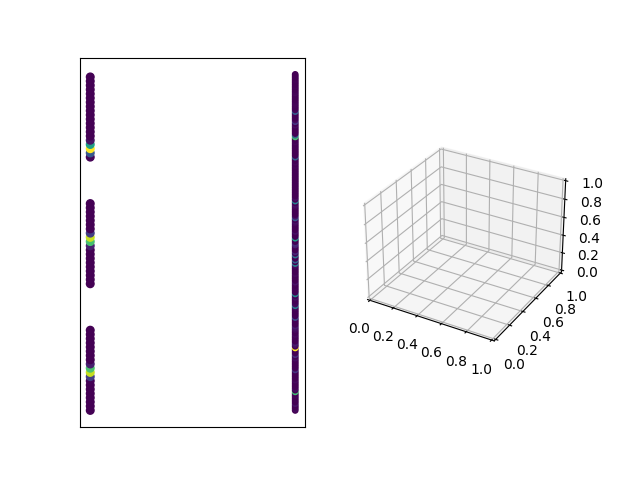

In [19]:
%matplotlib widget
fig, ani = animate_all(unit_locations, X_raw[:5000], V, input_coords, hidden_coords, S, X[:5000])
plt.show(block=False)

In [20]:
plt.close(fig)

In [13]:
def plot_trajectory_and_units(states, unit_locations):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)
    ax.scatter(
        unit_locations[:, 0], unit_locations[:, 1], unit_locations[:, 2], color="r"
    )
    ax.set_title("Lorenz System Trajectory and Unit Positions")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

In [14]:
def animate_activations(unit_locations, states, unit_activation):
    # Create a new figure
    fig = plt.figure()

    # Add a 3D subplot
    ax = fig.add_subplot(111, projection="3d")

    # Plot the initial trajectory and unit locations
    # trajectory, = ax.plot([], [], [], lw=0.5)
    units = ax.scatter(
        unit_locations[:, 0], unit_locations[:, 1], unit_locations[:, 2], c=[]
    )

    # Set the title and labels
    ax.set_title("Lorenz Unit Activations")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Function to update the plot for each frame
    def update(i):
        # Update the trajectory
        # trajectory.set_data(states[:i+1, 0], states[:i+1, 1])
        # trajectory.set_3d_properties(states[:i+1, 2])

        # Update the unit colors based on their activation state
        units.set_array(unit_activation[i, :])

        return units
        # return trajectory, units

    # Create the animation
    anim = FuncAnimation(fig, update, frames=len(states), interval=5)
    return fig, anim

In [22]:
def animate_scatter_and_line(positions, trajectory, activations):
    T, _, N = positions.shape
    M, _ = trajectory.shape

    # Create a figure and 3D axis for the scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter([], [], [], c=[], marker='o')
    line, = ax.plot([], [], [], c='b', linewidth=0.5, alpha=0.5)  # Static line trajectory

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    # Update function for animation
    def update(frame):
        x = positions[frame, 0, :]
        y = positions[frame, 1, :]
        z = positions[frame, 2, :]
        scatter._offsets3d = (x, y, z)
        scatter.set_array(activations[frame])

        line.set_data(trajectory[:frame, 0], trajectory[:frame, 1])
        line.set_3d_properties(trajectory[:frame, 2])

        return scatter, line

    # Create the animation
    ani = FuncAnimation(fig, update, frames=T, blit=True, interval=1)
    return fig, ani

In [10]:
def animate_all(positions, trajectory, activations):
    T, _, N = positions.shape
    M, _ = trajectory.shape

    # Create a figure and 3D axis for the scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter([], [], [], c=[], marker='o')
    line, = ax.plot([], [], [], c='b', linewidth=0.5, alpha=0.5)  # Static line trajectory

    # Set axis limits
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)

    # Update function for animation
    def update(frame):
        x = positions[frame, 0, :]
        y = positions[frame, 1, :]
        z = positions[frame, 2, :]
        scatter._offsets3d = (x, y, z)
        scatter.set_array(activations[frame])

        line.set_data(trajectory[:frame, 0], trajectory[:frame, 1])
        line.set_3d_properties(trajectory[:frame, 2])

        return scatter, line

    # Create the animation
    ani = FuncAnimation(fig, update, frames=T, blit=True, interval=1)
    return fig, ani

In [11]:
X_raw[:5000].shape

(5000, 3)

In [13]:
unit_locations.shape

(5000, 3, 200)

In [14]:
V.shape

(5000, 200)

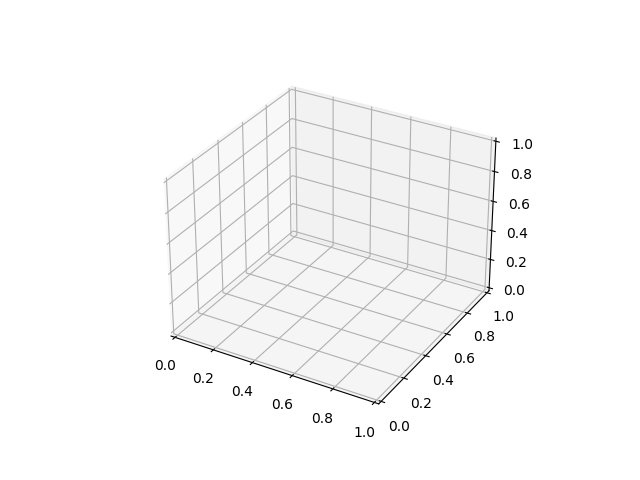

In [23]:
%matplotlib widget
fig, ani = animate_scatter_and_line(unit_locations, X_raw[:5000], V)

In [24]:
plt.close(fig)